# <font>2.Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location</font>

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=a2b1a641fded5bf401fc5f2ca4d23f0c' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730862000,
            "main": {
                "temp": 280.2,
                "feels_like": 280.2,
                "temp_min": 278.52,
                "temp_max": 280.2,
                "pressure": 1027,
                "sea_level": 1027,
                "grnd_level": 938,
                "humidity": 85,
                "temp_kf": 1.68
            },
            "weather": [
                {
                    "id": 804,
                    "main": "Clouds",
                    "description": "overcast clouds",
                    "icon": "04n"
                }
            ],
            "clouds": {
                "all": 88
            },
            "wind": {
                "speed": 0.93,
                "deg": 241,
                "gust": 0.93
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
        

In [3]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-11-06 03:00:00'

# 3.Extract relevant weather attributes such as temperature, humidity, wind speed, and  precipitation from the API response

In [4]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']
    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head()


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,280.20,85,0.93,overcast clouds,2024-11-06 03:00:00,2024-11-06,03:00:00
1,279.55,84,0.88,overcast clouds,2024-11-06 06:00:00,2024-11-06,06:00:00
2,281.91,74,1.09,overcast clouds,2024-11-06 09:00:00,2024-11-06,09:00:00
3,284.75,62,1.75,broken clouds,2024-11-06 12:00:00,2024-11-06,12:00:00
4,282.95,79,1.43,scattered clouds,2024-11-06 15:00:00,2024-11-06,15:00:00


In [5]:
data_df.shape

(40, 7)

# 4.Clean and preprocess the retrieved data, handling missing values or inconsistent  formats.

In [6]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


# 5.Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [8]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.00000,40.000000
mean,279.938250,80.35000,1.253250
std,2.373013,9.97574,0.373537
min,276.630000,58.00000,0.650000
25%,277.925000,73.00000,1.017500
50%,278.990000,81.00000,1.180000
75%,282.027500,89.25000,1.382500
max,284.750000,93.00000,2.140000


# <font>6.Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.</font>

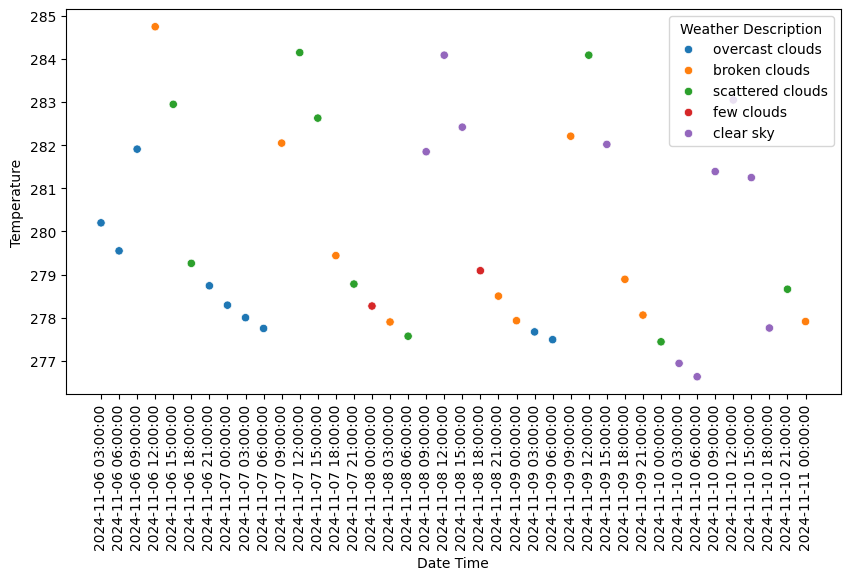

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

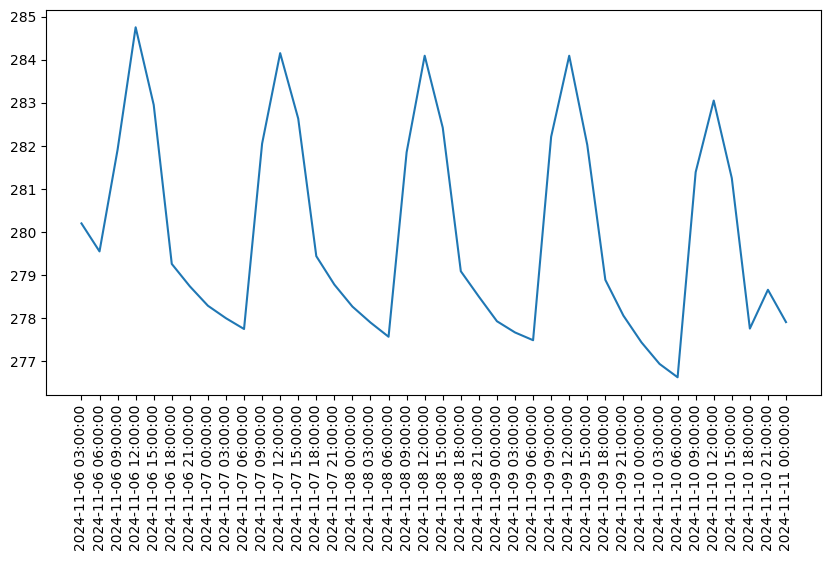

In [10]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Temperature'])
plt.xticks(rotation=90);

# <font>7.Apply data aggregation techniques to summarize weather statistics by specific time periods</font>                              

In [11]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-06,281.051429,1.138571
2024-11-07,280.136250,1.121250
2024-11-08,279.961250,1.196250
2024-11-09,279.795000,1.356250
2024-11-10,279.140000,1.328750
2024-11-11,277.910000,2.140000


In [12]:
data_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Weather Description',
       'Date Time', 'Date', 'Time'],
      dtype='object')

# <font>9.Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.</font>

<Axes: >

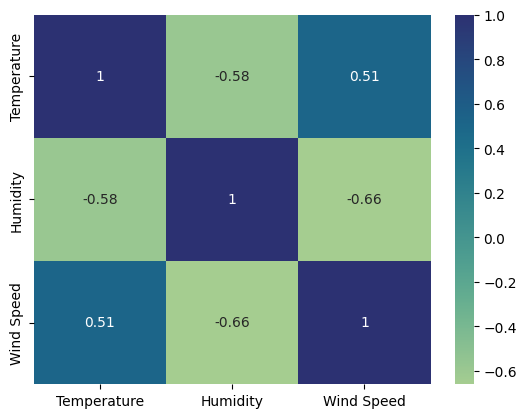

In [13]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')